In [4]:
import pandas as pd
import os

In [2]:
DF = pd.read_csv("../CSV Folder/Data.csv")
DF

,Film Title,IMDb Rating,Release Year,Genre,Director,Movie Image,Stars
0,The Shawshank Redemption,9.3,1994,Drama,Frank Darabont,https://m.media-amazon.com/images/M/MV5BNDE3OD...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,9.2,1972,"Crime, Drama",Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"Marlon Brando, Al Pacino, James Caan, Richard ..."
2,The Dark Knight,9.0,2008,"Action, Crime, Drama",Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,The Godfather Part II,9.0,1974,"Crime, Drama",Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"Al Pacino, Robert Duvall, Diane Keaton, Robert..."
4,12 Angry Men,9.0,1957,"Crime, Drama",Sidney Lumet,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G...."
...,...,...,...,...,...,...,...
245,It Happened One Night,8.1,1934,"Comedy, Romance",Frank Capra,https://m.media-amazon.com/images/M/MV5BMDg5Mm...,"Clark Gable, Claudette Colbert, Walter Connoll..."
246,Drishyam,8.2,2015,"Crime, Drama, Mystery",Nishikant Kamat,https://m.media-amazon.com/images/M/MV5BYmJhZm...,"Ajay Devgn, Shriya Saran, Tabu, Rajat Kapoor, ..."
247,Aladdin,8.0,1992,"Animation, Adventure, Comedy","Ron Clements, John Musker",https://m.media-amazon.com/images/M/MV5BZTg5ZT...,"Scott Weinger, Robin Williams, Linda Larkin, J..."
248,Dances with Wolves,8.0,1990,"Adventure, Drama, Western",Kevin Costner,https://m.media-amazon.com/images/M/MV5BMTY3OT...,"Kevin Costner, Mary McDonnell, Graham Greene, ..."


# ERD Diagram For The Relations

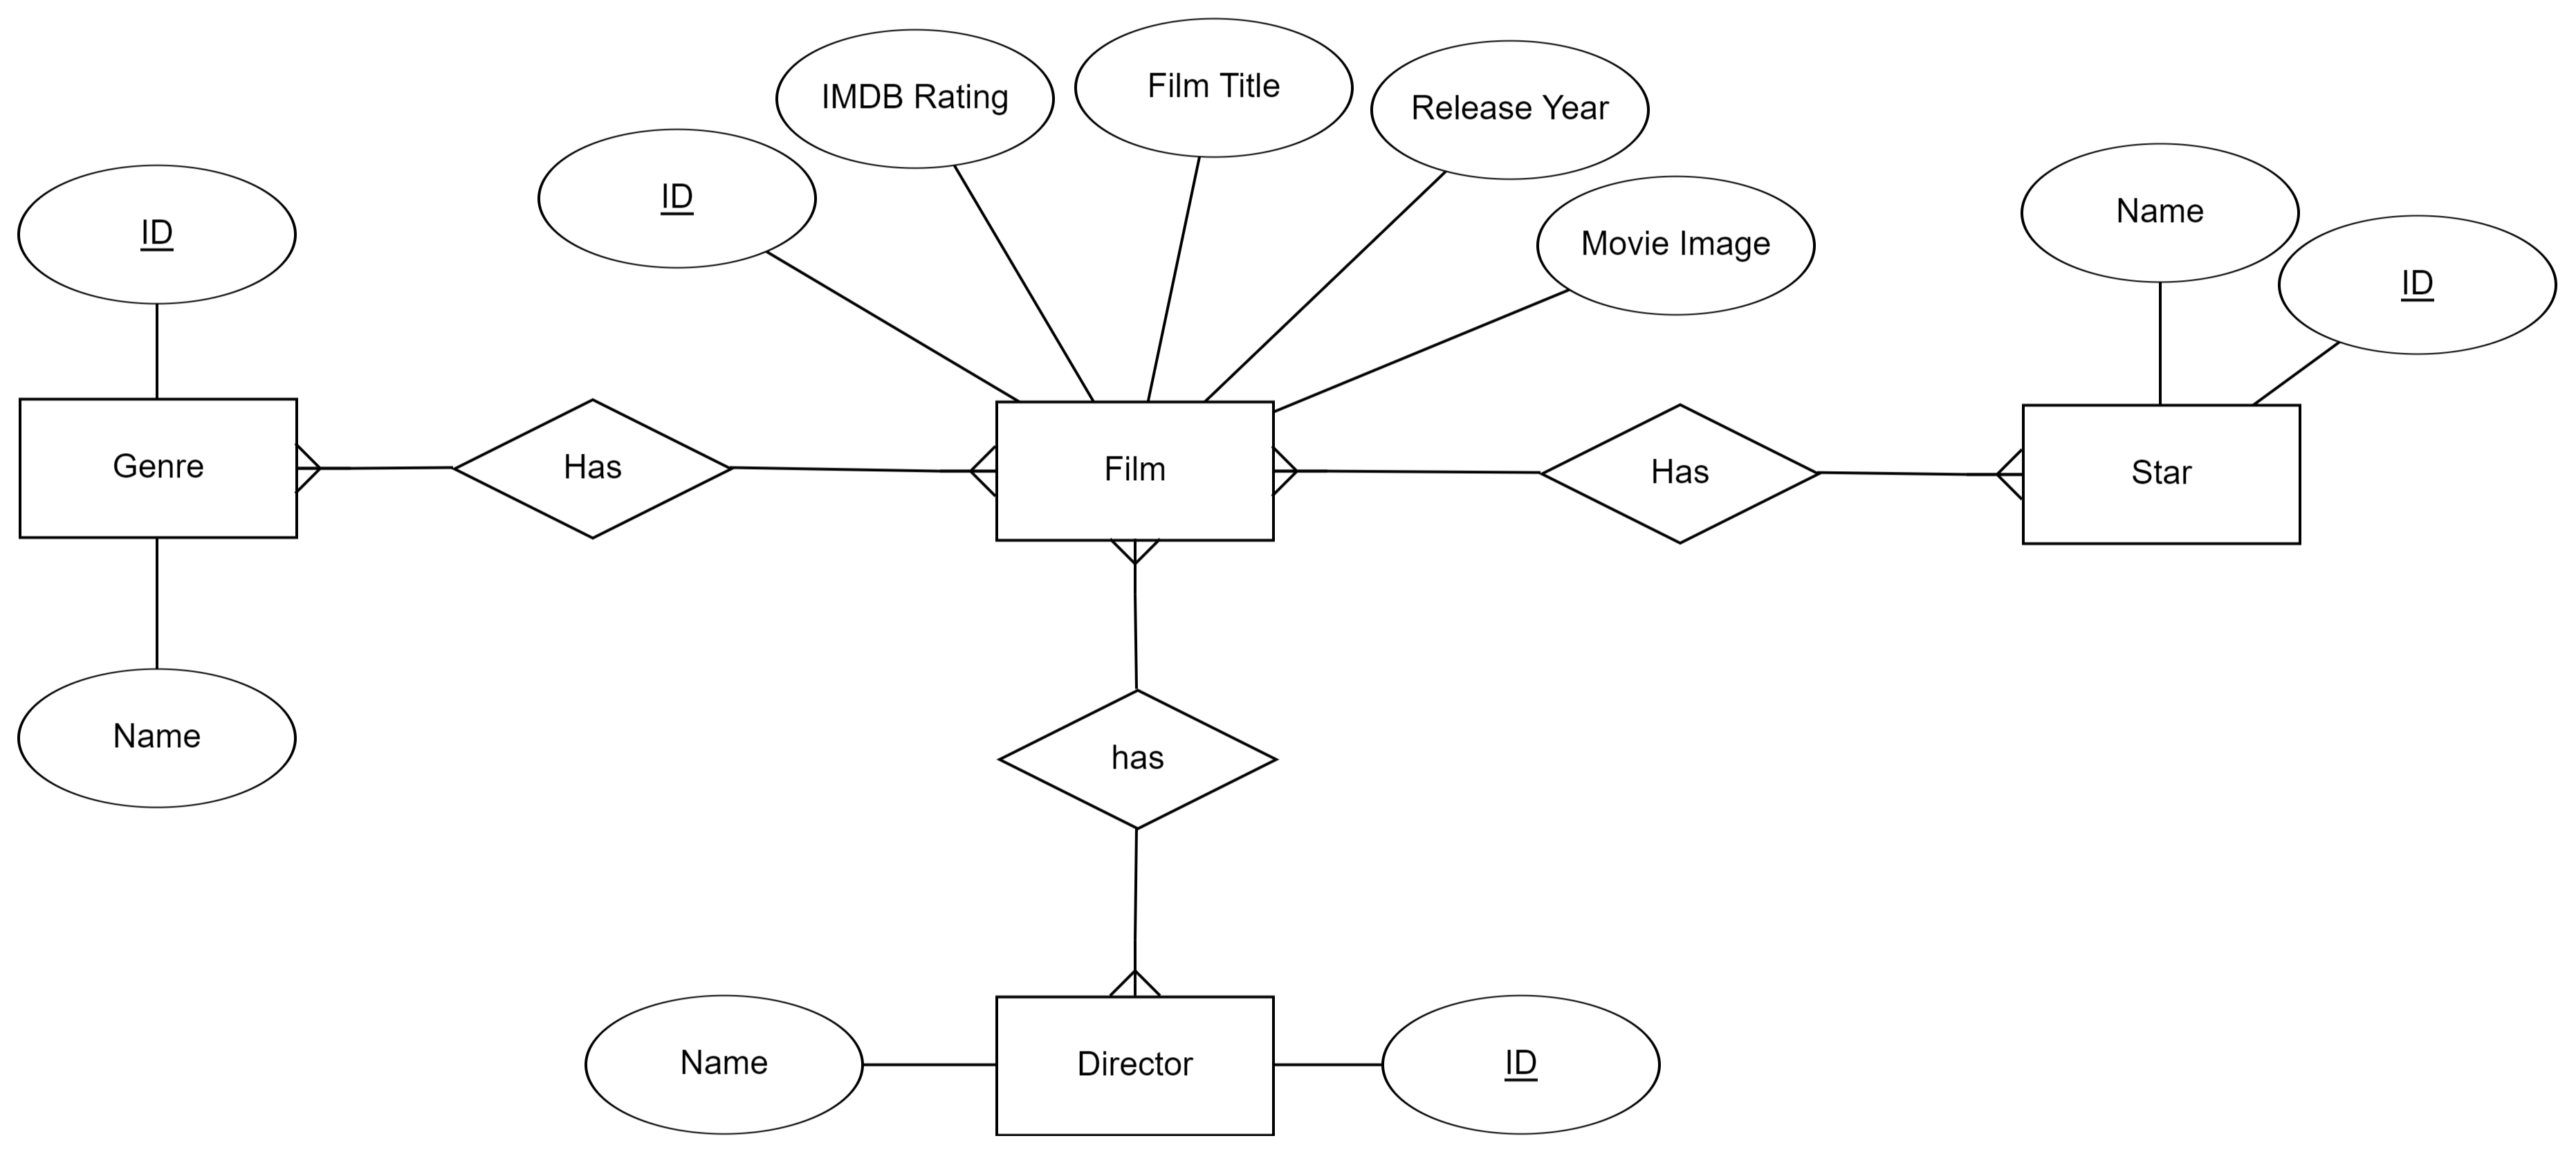

# Films sheet

In [5]:
filePath = "./Final_Normalized_Sheets/"

In [6]:
# Create the Films Sheet
films_df = DF[['Film Title', 'IMDb Rating', 'Release Year', 'Movie Image']].copy()
films_df.reset_index(drop=True, inplace=True)
films_df.index += 1
films_df.rename(columns={'index': 'FilmID'}, inplace=True)
films_df['FilmID'] = films_df.index
films_df = films_df[['FilmID', 'Film Title', 'IMDb Rating', 'Release Year', 'Movie Image']]
films_csv_file_path = os.path.join(filePath, "Films.csv")
films_df.to_csv(films_csv_file_path, index=False)

print(f"Films CSV file '{films_csv_file_path}' created successfully.")

Films CSV file './Final_Normalized_Sheets/Films.csv' created successfully.


In [9]:
films_df

,FilmID,Film Title,IMDb Rating,Release Year,Movie Image
1,1,The Shawshank Redemption,9.3,1994,https://m.media-amazon.com/images/M/MV5BNDE3OD...
2,2,The Godfather,9.2,1972,https://m.media-amazon.com/images/M/MV5BM2MyNj...
3,3,The Dark Knight,9.0,2008,https://m.media-amazon.com/images/M/MV5BMTMxNT...
4,4,The Godfather Part II,9.0,1974,https://m.media-amazon.com/images/M/MV5BMWMwMG...
5,5,12 Angry Men,9.0,1957,https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...
246,246,It Happened One Night,8.1,1934,https://m.media-amazon.com/images/M/MV5BMDg5Mm...
247,247,Drishyam,8.2,2015,https://m.media-amazon.com/images/M/MV5BYmJhZm...
248,248,Aladdin,8.0,1992,https://m.media-amazon.com/images/M/MV5BZTg5ZT...
249,249,Dances with Wolves,8.0,1990,https://m.media-amazon.com/images/M/MV5BMTY3OT...


# Generes Sheet

In [7]:
# Function to split and extract unique genres from the DataFrame
def extract_unique_genres(df):
    all_genres = set()
    for genres in df['Genre']:
        genre_list = [genre.strip() for genre in genres.split(',')]
        all_genres.update(genre_list)
    return list(all_genres)

# Assuming DF is already created from the previous code
# Extract unique genres
unique_genres = extract_unique_genres(DF)

# Create a DataFrame for genres
genres_df = pd.DataFrame(unique_genres, columns=['Genre'])

# Remove the first row
# genres_df = genres_df.iloc[1:].reset_index(drop=True)

# Add GenreID
genres_df.index += 1  # Start index from 1
genres_df['GenreID'] = genres_df.index

# Rearrange columns to place GenreID at the beginning
genres_df = genres_df[['GenreID', 'Genre']]

# Save to CSV file
genres_csv_file_path = os.path.join(filePath, "Genres.csv")
genres_df.to_csv(genres_csv_file_path, index=False)

print(f"Genres CSV file '{genres_csv_file_path}' created successfully.")

Genres CSV file './Final_Normalized_Sheets/Genres.csv' created successfully.


In [8]:
genres_df

,GenreID,Genre
1,1,Family
2,2,Thriller
3,3,Sci-Fi
4,4,Sport
5,5,Music
6,6,Adventure
7,7,Action
8,8,Western
9,9,Comedy
10,10,War


# Directors Sheet

In [10]:
# Create the Directors Sheet
def extract_unique_directors(df):
    all_directors = set()
    for directors in df['Director']:
        director_list = [director.strip() for director in directors.split(',')]
        all_directors.update(director_list)
    return list(all_directors)

unique_directors = extract_unique_directors(DF)
directors_df = pd.DataFrame(unique_directors, columns=['Director'])

# Remove the first row if necessary (uncomment if the first row is empty or not needed)
# directors_df = directors_df.iloc[1:].reset_index(drop=True)

# Add DirectorID
directors_df.index += 1
directors_df['DirectorID'] = directors_df.index
directors_df = directors_df[['DirectorID', 'Director']]
directors_csv_file_path = os.path.join(filePath, "Directors.csv")
directors_df.to_csv(directors_csv_file_path, index=False)

print(f"Directors CSV file '{directors_csv_file_path}' created successfully.")

Directors CSV file './Final_Normalized_Sheets/Directors.csv' created successfully.


In [11]:
directors_df

,DirectorID,Director
1,1,David Lynch
2,2,Florian Henckel von Donnersmarck
3,3,Thomas Vinterberg
4,4,Steve McQueen
5,5,Justin K. Thompson
...,...,...
173,173,David Lean
174,174,Kevin Costner
175,175,Anthony Russo
176,176,Frank Capra


# Star Sheet

In [12]:
# Create the Stars Sheet
def extract_unique_stars(df):
    all_stars = set()
    for stars in df['Stars']:
        star_list = [star.strip() for star in stars.split(',')]
        all_stars.update(star_list)
    return list(all_stars)

unique_stars = extract_unique_stars(DF)
stars_df = pd.DataFrame(unique_stars, columns=['Star'])

#stars_df = stars_df.iloc[1:].reset_index(drop=True)

# Add StarID
stars_df.index += 1
stars_df['StarID'] = stars_df.index
stars_df = stars_df[['StarID', 'Star']]
stars_csv_file_path = os.path.join(filePath, "Stars.csv")
stars_df.to_csv(stars_csv_file_path, index=False)

print(f"Stars CSV file '{stars_csv_file_path}' created successfully.")

Stars CSV file './Final_Normalized_Sheets/Stars.csv' created successfully.


In [13]:
stars_df

,StarID,Star
1,1,Jaroslaw Kopaczewski
2,2,David Ryall
3,3,Melinda McGraw
4,4,Eleanor Witt
5,5,Honsen Haga
...,...,...
16738,16738,Jude Law
16739,16739,Sarah-Jane De Crespigny
16740,16740,Robert Sedona
16741,16741,Andrew Guzman
